In [4]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df=pd.read_csv('train.csv')
df.info()
df.isnull().sum() #to find exact no. of null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [118]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.isnull().sum()

/tmp/ipython-input-118-1076045039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


KeyError: 'Embarked'

Plotting graphs for survival %

In [ ]:
sns.countplot(x='Survived',data=df)

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=df)

Age distribution

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=40, kde=True)

handled null,visualized data and explored a bot..now we can prepare it for training ml model

Dropping Unecessary data


In [39]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

Converting strings to numeric as model can't read strings

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [ ]:
df.isnull().sum()

giving target and features

In [43]:
X = df.drop('Survived', axis=1) #this is the features
y = df['Survived']  #this is the target

Splitting the data into test and training

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

importing and training logistic regression model

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Evaluating the model

In [49]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



We will now try to make the data more accurate

In [50]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['Alone'] = (df['FamilySize'] == 1).astype(int)
#we created family size and alone to chk if being with family or alone had any difrrence

<Axes: xlabel='Survived', ylabel='count'>

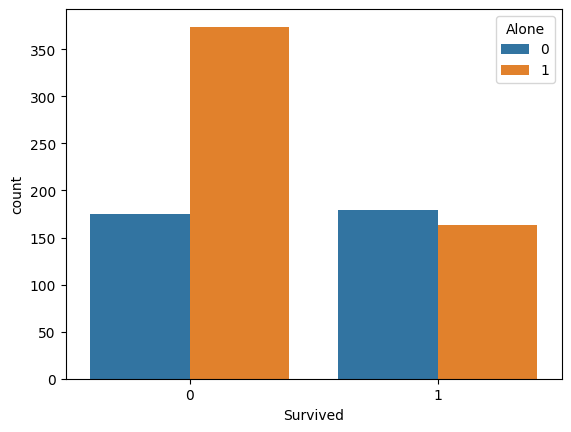

In [51]:
sns.countplot(x='Survived', hue='Alone', data=df)

In [54]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


Reducing the titles

In [55]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer',
                                   'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

Coverting text to number

In [57]:
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

Now chking accuracy again by training it

In [84]:
X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scaling our data due to warning

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7932960893854749
Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



Scaling again

In [ ]:
X = df.drop(columns=['Survived', 'Name', 'Ticket'])
y = df['Survived']

print(X.columns)
print(X.dtypes)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Using random forest to train the data

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)
print("\nRandom Forest Report:\n", classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.8491620111731844

Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       105
           1       0.83      0.80      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



chking which features driving the prediction


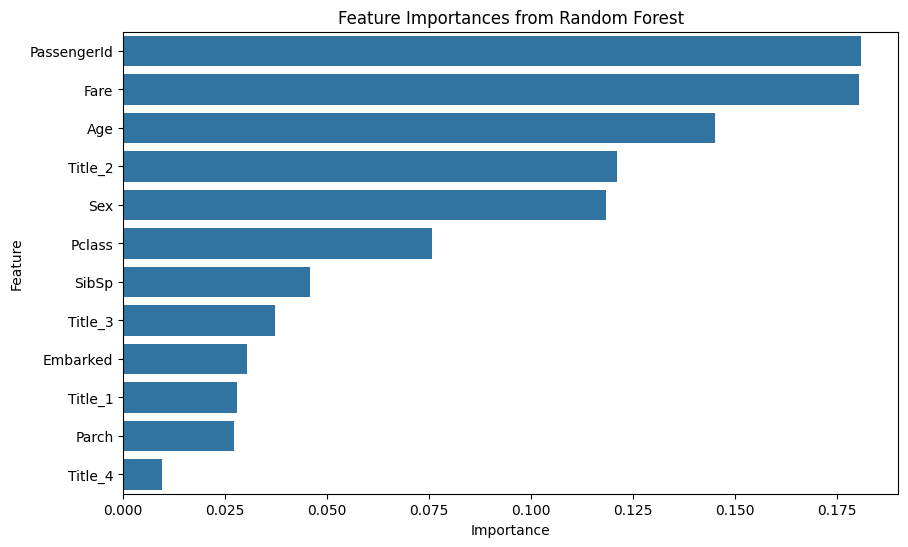

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importances from Random Forest')
plt.show()


Now after chking importances removing passenger id as it is not related to survival

In [95]:
X = df.drop(columns=['Survived', 'Name', 'Ticket','PassengerId','Title_4'])
y = df['Survived']

print(X.columns)
print(X.dtypes)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title_1',
       'Title_2', 'Title_3'],
      dtype='object')
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Title_1        bool
Title_2        bool
Title_3        bool
dtype: object
Accuracy: 0.7877094972067039
Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Again using random forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)
print("\nRandom Forest Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.8212290502793296

Random Forest Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



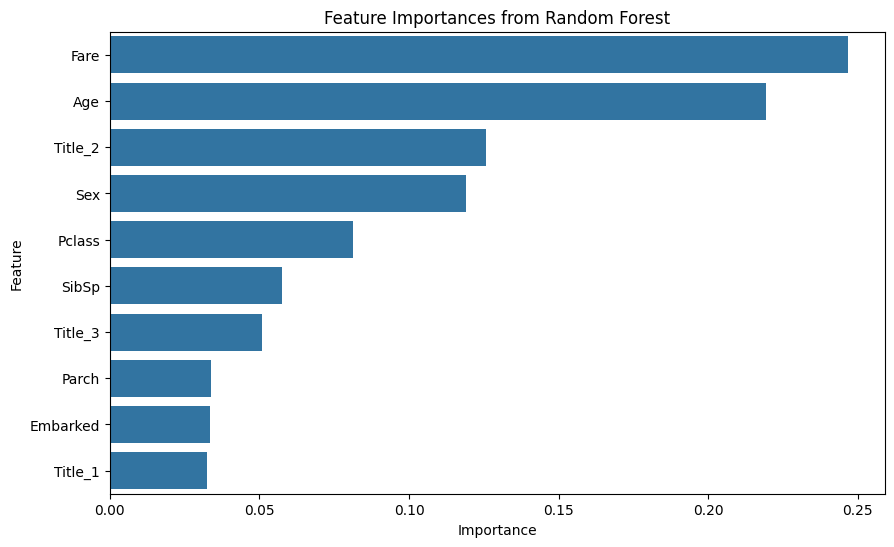

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importances from Random Forest')
plt.show()

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#spliiting data for initial training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7821229050279329
Random Forest Accuracy: 0.8268156424581006


In [103]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Sex_1',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression (Scaled) Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression (Scaled) Accuracy: 0.7877094972067039


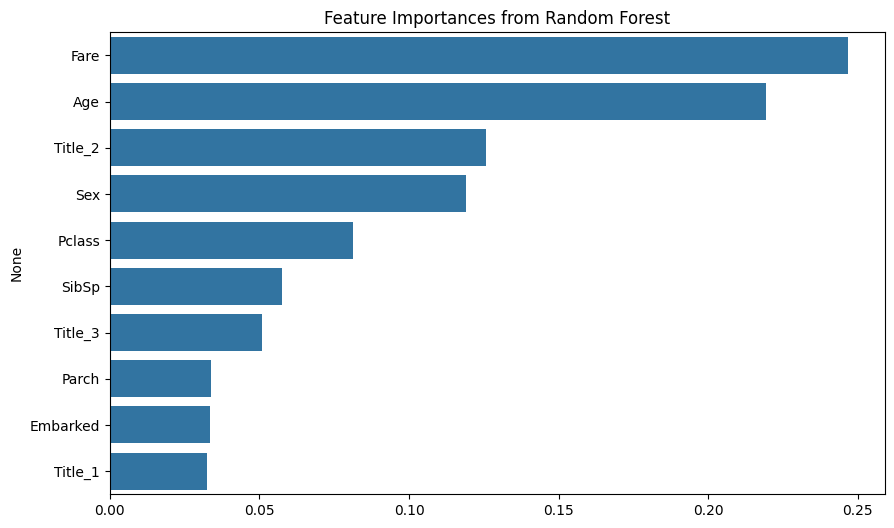

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importances from Random Forest')
plt.show()

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Params:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.832772581758835


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:55:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8156424581005587


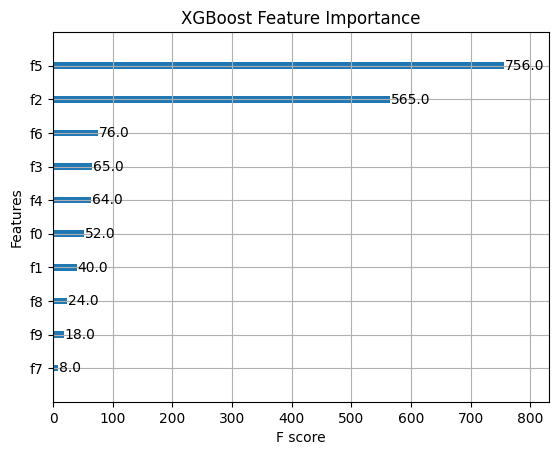

In [109]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')


xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()

In [110]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
grid = GridSearchCV(xgb_model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print("✅ Best Params:", grid.best_params_)
print("📈 Best Accuracy:", grid.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
📈 Best Accuracy: 0.832837584950261


Training Final model with best parameters

In [111]:
final_xgb = xgb.XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False
)
final_xgb.fit(X_train, y_train)
y_pred_xgb = final_xgb.predict(X_test)

from sklearn.metrics import accuracy_score
final_acc = accuracy_score(y_test, y_pred_xgb)
print("🏁 Final XGBoost Test Accuracy:", final_acc)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🏁 Final XGBoost Test Accuracy: 0.8100558659217877


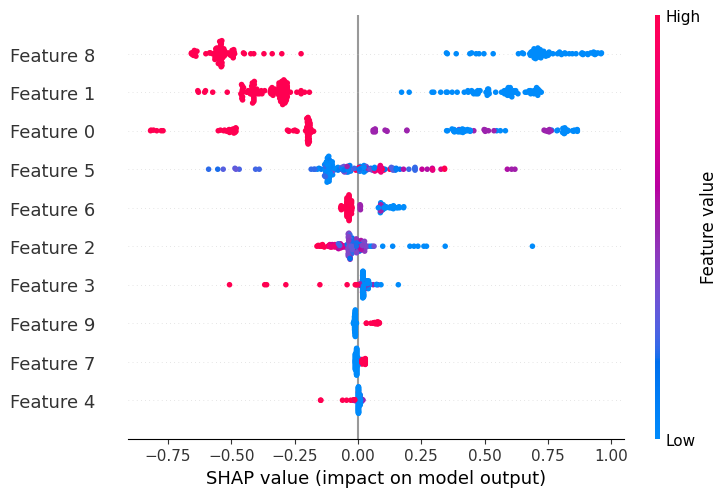

In [112]:
import shap
explainer = shap.Explainer(final_xgb)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

Now we are done training we will start testing our data

In [113]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


In [116]:
import pandas as pd
fd = pd.read_csv('test.csv')
fd

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [117]:
fd.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [121]:
fd['Age'] = fd['Age'].fillna(df['Age'].median())
fd['Fare'] = fd['Fare'].fillna(df['Fare'].median())
fd = fd.drop('Cabin',axis=1)
fd.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [122]:
fd['Title'] = fd['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [123]:
fd['Title']=fd['Name'].str.extract('([A-Za-z]+)\.',expand=False)
fd['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [124]:
fd['Title'] = fd['Title'].replace(['Col', 'Rev', 'Dr', 'Dona'], 'Rare')
fd['Title'] = fd['Title'].replace('Ms', 'Miss')

In [125]:
fd = pd.get_dummies(fd, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

In [130]:
X_cols = X.columns
fd = fd.reindex(columns=X_cols, fill_value=0)

In [132]:
whos

Variable                 Type                      Data/Info
------------------------------------------------------------
GridSearchCV             ABCMeta                   <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
LabelEncoder             type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
StandardScaler           type                      <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                        DataFrame                      Pclass  Sex   Age  S<...>\n[891 rows x 10 columns]
X_cols                   Index                     Index(['Pclass', 'Sex', '<...>],\n      dtype='object')
X_scaled                 ndarray                   891x10: 8910 elems, type `float64`, 71280 bytes
X_test                   ndarr

In [134]:
final_preds = final_xgb.predict(fd)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [135]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": final_preds
})
submission.to_csv("submission.csv", index=False)